In [3]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle
from pprint import pprint

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

# Custom modules (if needed)
# module_path = os.path.join(os.path.expanduser('~'), 'CustomModules')
# sys.path.append(module_path)
# from telegram_notify import notify
# from plotting_tools import error_band_plot, get_ax_data_range

# Add the parent directory to sys.path (if needed)
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent.parent))

# Other modules (if needed)

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

jtplot.style(context='paper', theme='grade3', grid=False, ticks=True)
DFT_FIG_WIDTH_WIDE = 11
DFT_FIG_WIDTH = 5.3
COLORS = plt.get_cmap('tab10')
# Choose in ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 
# 'tab10', 'tab20', 'tab20b', 'tab20c']

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [27]:
from collect_bb_simulation_data import calculate_all_df_ps

df_ps = calculate_all_df_ps(n=144, p=0.001, cluster_frac_precision=4)

Scanning ../data/bb_circuit_iter30_minsum_lsd0 for all available (n, T, p) combinations...
Found 1 matching unique (n, T, p) combinations.
Processing combination: n=144, T=12, p=0.001
Found 500 data files for n=144, T=12, p=0.001.
Pre-compiling Numba histogram function...
Numba function pre-compiled.
Processing 500 files iteratively (Numba histograms)...


100%|██████████| 500/500 [01:36<00:00,  5.19it/s]


--- Benchmarking Results ---
Total time reading files: 24.2332 seconds
Total time calculating fractions: 6.1501 seconds
Total time calculating histograms: 64.0589 seconds
----------------------------
  → Generated df_ps with 10000 rows from 1000000000 total samples.
  Calculating probabilities for 1000000000 total samples...
  → Successfully processed combination, added 10000 rows to results.

Concatenating results for 1 successful combinations...
Setting multi-index (n, T, p, c)...
Sorting index...
Concatenation and indexing complete.


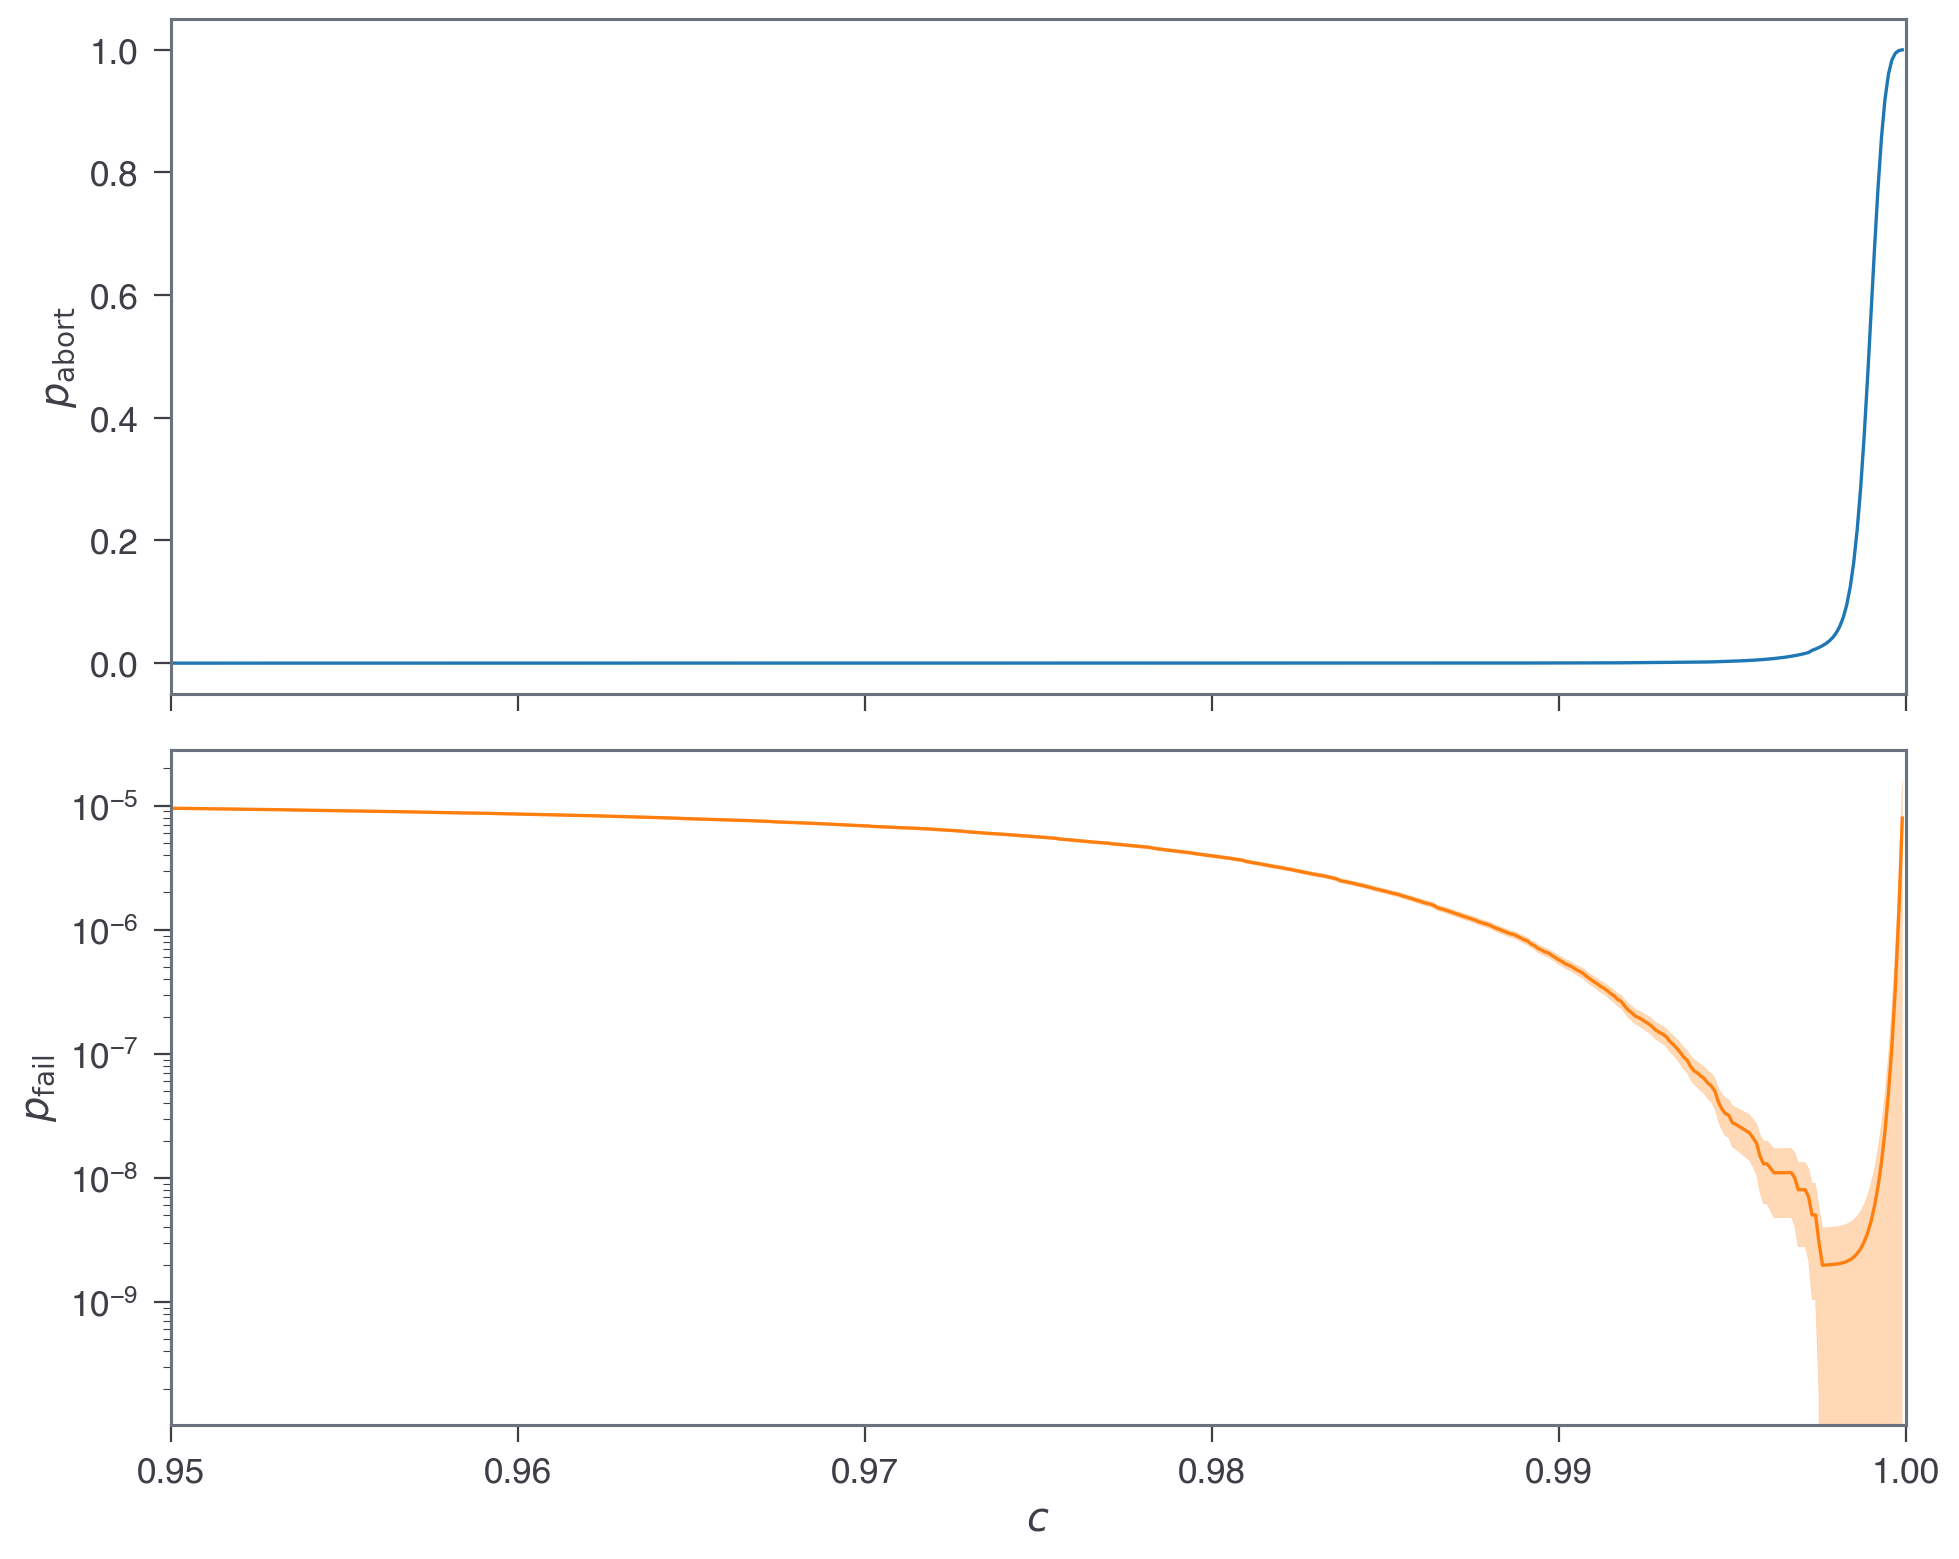

In [28]:
# Create a figure with two subplots (one for p_acc, one for p_fail)
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

df_ps = df_ps.reset_index()

color = COLORS(0)
sns.lineplot(
    data=df_ps,
    x="c",
    y="p_abort",
    ax=axes[0],
    color=color,
)
axes[0].fill_between(
    df_ps["c"],
    df_ps["p_abort"] - df_ps["delta_p_abort"],
    df_ps["p_abort"] + df_ps["delta_p_abort"],
    alpha=0.3,
    color=color,
)

color = COLORS(1)
sns.lineplot(data=df_ps, x="c", y="p_fail", ax=axes[1], color=color)
axes[1].fill_between(
    df_ps["c"],
    df_ps["p_fail"] - df_ps["delta_p_fail"],
    df_ps["p_fail"] + df_ps["delta_p_fail"],
    alpha=0.3,
    color=color,
)

# Set titles and labels
axes[0].set_ylabel(r"$p_\mathrm{abort}$")
axes[1].set_xlabel(r"$c$")
axes[1].set_ylabel(r"$p_\mathrm{fail}$")
axes[1].set_yscale("log")

for ax in axes:
    ax.set_xlim(0.95, 1)

# Adjust layout
plt.tight_layout()
plt.show()

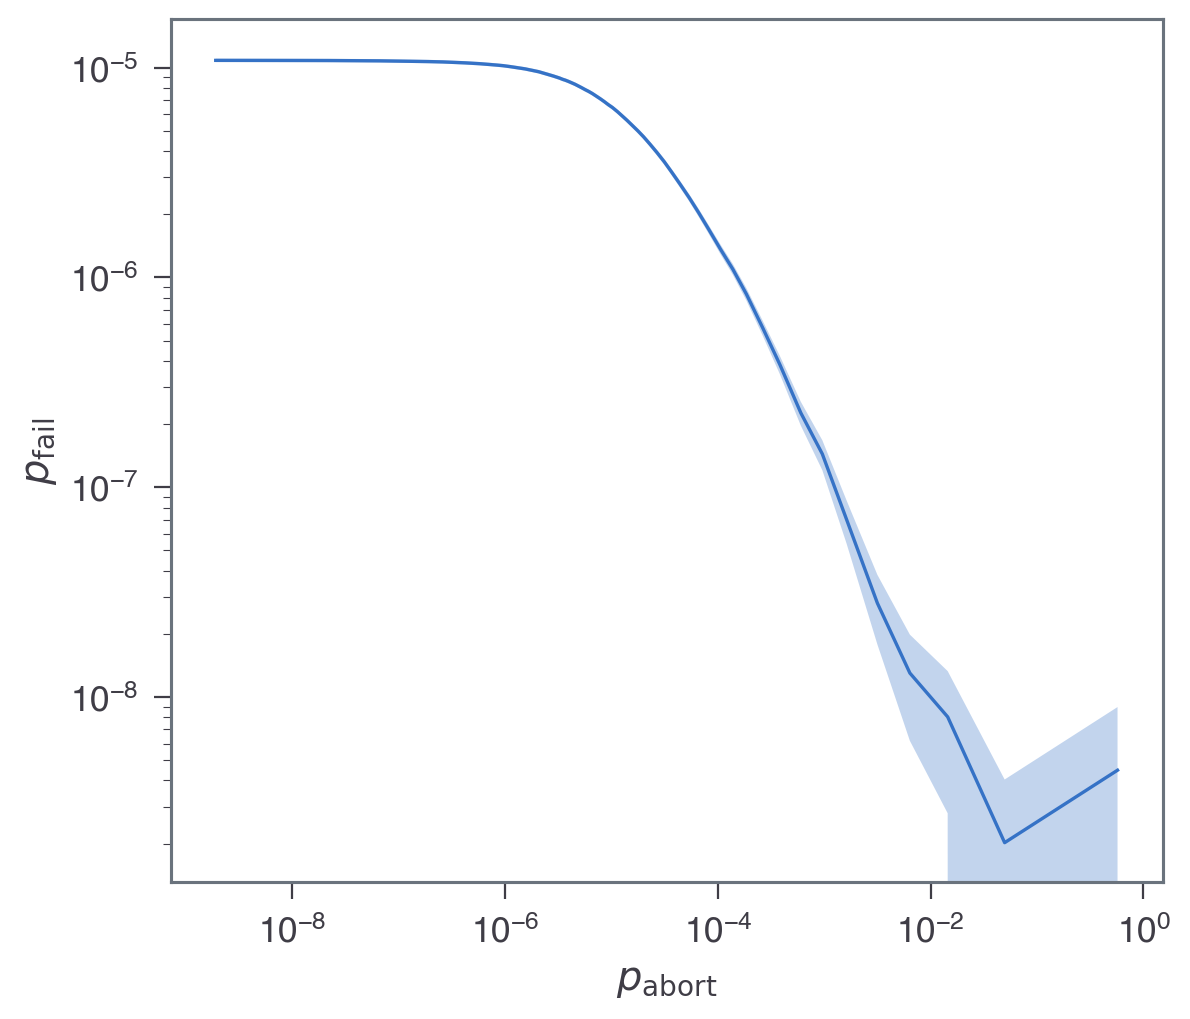

In [24]:
plt.plot(df_ps["p_abort"], df_ps["p_fail"])
plt.fill_between(
    df_ps["p_abort"],
    df_ps["p_fail"] - df_ps["delta_p_fail"],
    df_ps["p_fail"] + df_ps["delta_p_fail"],
    alpha=0.3,
)
plt.xscale("log")
# plt.xlim(0, 1)
plt.yscale("log")

plt.xlabel(r"$p_\mathrm{abort}$")

plt.ylabel(r"$p_\mathrm{fail}$")
plt.show()